In [ ]:
!pip install wordcloud


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.1/511.1 kB 7.2 MB/s eta 0:00:00


**IMPORT NECESSARY LIBRARIES**

In [ ]:
# Data manipulation and analysis
import pandas as pd
import numpy as np
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# Text processing and NLP
import nltk
import re
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
# Model persistence
import pickle
# Data preprocessing and modeling utilities
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
# Naive Bayes classifiers
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
# Model evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

**Load Movies Data Reviews and view first 5 rows**

In [ ]:
df = pd.read_csv('IMDBDataset.csv', encoding='utf-8')
df.head()

,review,class
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


**RENAME THE CLASS FEATURE**

In [ ]:
df = df.rename(columns={'class': 'sentiment'})

**Exploratory Data Analysis**

**1. SHAPE OF THE DATASET**

In [ ]:
df.shape

(50000, 2)

**2. CHECK NULL VALUES IN THE DATASET**

In [ ]:
df.isnull().sum()

,0
review,0
sentiment,0


**3. DESCRIBING DATASET**

In [ ]:
df.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


**INFORMATION ABOUT THE DATASET**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


**UNIQUE VALUES IN THE SENTIMENT FEATURE**

In [ ]:
df['sentiment'].unique()

array(['positive', 'negative'], dtype=object)

In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
positive,25000
negative,25000


**COUNTPLOT TO CHECK THE DATA IS EQUALLY NORMALIZED**

<ipython-input-15-a02b0b494b3f>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment', data=df, palette={'positive': 'skyblue', 'negative': 'salmon'})


<Axes: xlabel='sentiment', ylabel='count'>

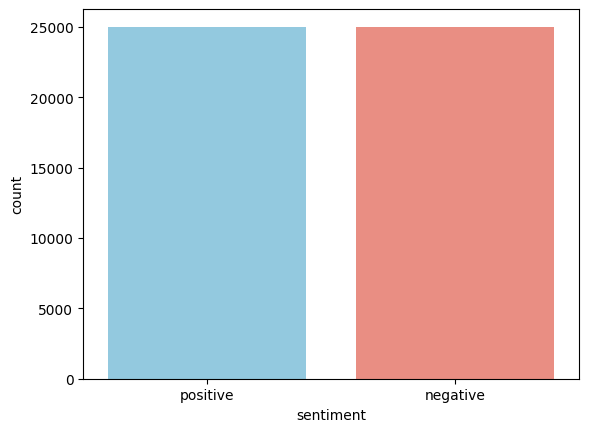

In [ ]:
sns.countplot(x='sentiment', data=df, palette={'positive': 'skyblue', 'negative': 'salmon'})

**FUNCTION TO COUNT NUMBER OF WORDS PRESENT IN EACH "REVIEW"**

In [ ]:
def no_of_words(text):
  words = text.split()
  word_count = len(words)
  return word_count

In [ ]:
df['word_count'] = df['review'].apply(no_of_words)

**Counting words before Preprocessing Steps**

In [ ]:
df.head()

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,positive,307
1,A wonderful little production. <br /><br />The...,positive,162
2,I thought this was a wonderful way to spend ti...,positive,166
3,Basically there's a family where a little boy ...,negative,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive,230


**WordCount to Check the Distribution of the Positive and Negative Reviews**

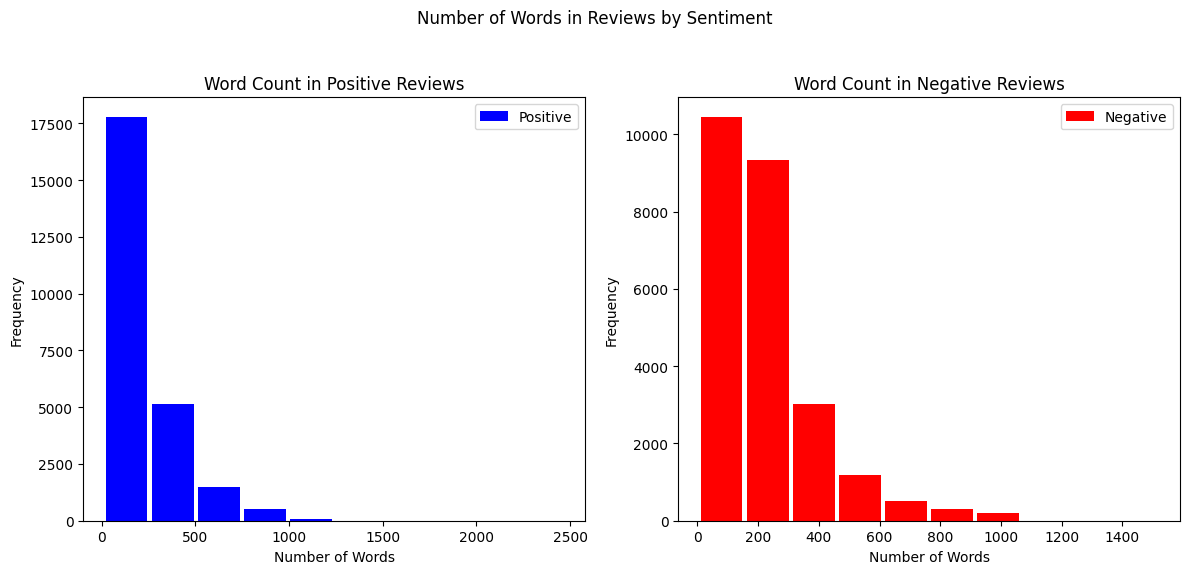

In [ ]:
# Creating the subplots for histograms
fig, ax = plt.subplots(1, 2, figsize=(12, 6))

# Histogram for Positive Reviews (sentiment = '1')
ax[0].hist(df[df['sentiment'] == 'positive']['review'].str.split().apply(len), label='Positive', color='blue', rwidth=0.9)
ax[0].set_title('Word Count in Positive Reviews')
ax[0].set_xlabel('Number of Words')
ax[0].set_ylabel('Frequency')
ax[0].legend(loc='upper right')

# Histogram for Negative Reviews (sentiment = '0')
ax[1].hist(df[df['sentiment'] == 'negative']['review'].str.split().apply(len), label='Negative', color='red', rwidth=0.9)
ax[1].set_title('Word Count in Negative Reviews')
ax[1].set_xlabel('Number of Words')
ax[1].set_ylabel('Frequency')
ax[1].legend(loc='upper right')

# Main title for the figure
fig.suptitle('Number of Words in Reviews by Sentiment')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit title
plt.show()

**Apply LabelEncoder to make target Feature into numerical (Positive : 1 , Negative : 0)**

In [ ]:
label = LabelEncoder()
df['sentiment'] = label.fit_transform(df['sentiment'])

In [ ]:
df.head()

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


**Text Preprocessing**

**Cleaning**

***1. Removing HTML Tags***

In [ ]:
def clean_text(text):
  clean = re.compile('<.*?>')
  return re.sub(clean, '', text)

**After Removing HTML Tags**

In [ ]:
df.head()

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production. <br /><br />The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there's a family where a little boy ...,0,138
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,230


In [ ]:
def remove_special_characters(text):
  x = ''
  for i in text:
    if i.isalnum() or i == ' ':
      x += i
    else:
      x += ' '
  return x

In [ ]:
df['review'] = df['review'].apply(remove_special_characters)

In [ ]:
df.head()

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production br br The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there s a family where a little boy ...,0,138
4,Petter Mattei s Love in the Time of Money is...,1,230


In [ ]:
duplicated_count = df.duplicated().sum()
print('Duplicated Entries in the Data: ',duplicated_count)

Duplicated Entries in the Data:  419


In [ ]:
df = df.drop_duplicates()

In [ ]:
df['sentiment'].value_counts()

,count
sentiment,
1,24884
0,24697


In [ ]:
df.head()

,review,sentiment,word_count
0,One of the other reviewers has mentioned that ...,1,307
1,A wonderful little production br br The...,1,162
2,I thought this was a wonderful way to spend ti...,1,166
3,Basically there s a family where a little boy ...,0,138
4,Petter Mattei s Love in the Time of Money is...,1,230


In [ ]:
def convert_lowercase(text):
  return text.lower()

In [ ]:
df['review'] = df['review'].apply(convert_lowercase)

In [ ]:
df.head()

,review,sentiment,word_count
0,one of the other reviewers has mentioned that ...,1,307
1,a wonderful little production br br the...,1,162
2,i thought this was a wonderful way to spend ti...,1,166
3,basically there s a family where a little boy ...,0,138
4,petter mattei s love in the time of money is...,1,230


In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
def remove_stopwords(text):
  x = []
  for i in text.split():
    if i not in stopwords.words('english'):
      x.append(i)
  y = x[:]
  x.clear()
  return y

In [ ]:
df['review'] = df['review'].apply(remove_stopwords)

In [ ]:
df.head()

,review,sentiment,word_count
0,"[one, reviewers, mentioned, watching, 1, oz, e...",1,307
1,"[wonderful, little, production, br, br, filmin...",1,162
2,"[thought, wonderful, way, spend, time, hot, su...",1,166
3,"[basically, family, little, boy, jake, thinks,...",0,138
4,"[petter, mattei, love, time, money, visually, ...",1,230


In [ ]:
ps = PorterStemmer()

In [ ]:
def stemming(data):
  text = [ps.stem(word) for word in data]
  return data

In [ ]:
df.review = df['review'].apply(lambda x: stemming(x))

In [ ]:
df.head()

,review,sentiment,word_count
0,"[one, reviewers, mentioned, watching, 1, oz, e...",1,307
1,"[wonderful, little, production, br, br, filmin...",1,162
2,"[thought, wonderful, way, spend, time, hot, su...",1,166
3,"[basically, family, little, boy, jake, thinks,...",0,138
4,"[petter, mattei, love, time, money, visually, ...",1,230


In [ ]:
def join_text(list_input):
  return " ".join(list_input)

In [ ]:
df['review'] = df['review'].apply(join_text)

In [ ]:
df.head()

,review,sentiment,word_count
0,one reviewers mentioned watching 1 oz episode ...,1,307
1,wonderful little production br br filming tech...,1,162
2,thought wonderful way spend time hot summer we...,1,166
3,basically family little boy jake thinks zombie...,0,138
4,petter mattei love time money visually stunnin...,1,230


In [ ]:
df['word_count'] = df['review'].apply(no_of_words)

In [ ]:
df.head()

,review,sentiment,word_count
0,one reviewers mentioned watching 1 oz episode ...,1,169
1,wonderful little production br br filming tech...,1,92
2,thought wonderful way spend time hot summer we...,1,89
3,basically family little boy jake thinks zombie...,0,72
4,petter mattei love time money visually stunnin...,1,133


In [ ]:
pos_reviews = df[df['sentiment'] == 1]
pos_reviews.head()

,review,sentiment,word_count
0,one reviewers mentioned watching 1 oz episode ...,1,169
1,wonderful little production br br filming tech...,1,92
2,thought wonderful way spend time hot summer we...,1,89
4,petter mattei love time money visually stunnin...,1,133
5,probably time favorite movie story selflessnes...,1,56


In [ ]:
neg_reviews = df[df['sentiment'] ==  0]
neg_reviews.head()

,review,sentiment,word_count
3,basically family little boy jake thinks zombie...,0,72
7,show amazing fresh innovative idea 70 first ai...,0,85
8,encouraged positive comments film looking forw...,0,66
10,phil alien one quirky films humour based aroun...,0,58
11,saw movie 12 came recall scariest scene big bi...,0,88


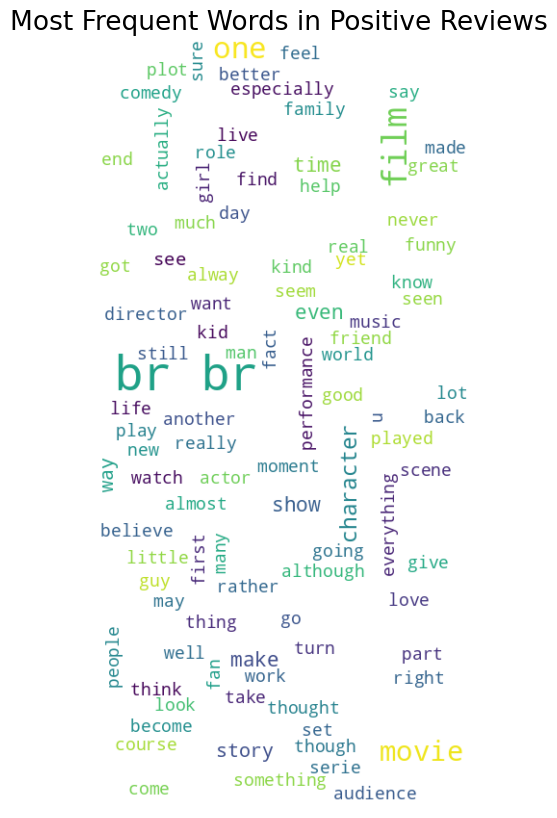

In [ ]:
text = " ".join(word for word in pos_reviews['review'])
plt.figure(figsize=(20,10), facecolor='None')
wordcloud = WordCloud(max_font_size=50, max_words=100, height = 800,background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Frequent Words in Positive Reviews', fontsize = 19)
plt.show()

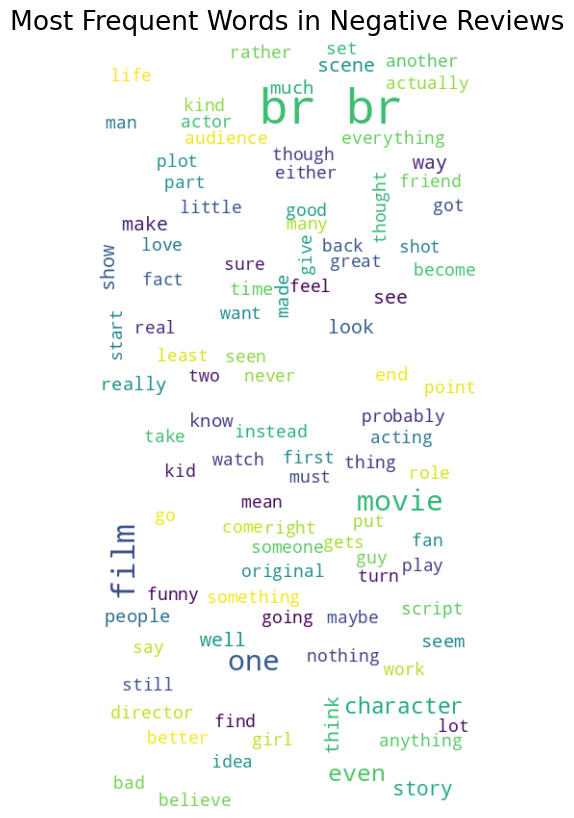

In [ ]:
text = " ".join(word for word in neg_reviews['review'])
plt.figure(figsize=(20,10), facecolor='None')
wordcloud = WordCloud(max_font_size=50, max_words=100, height = 800,background_color="white").generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Most Frequent Words in Negative Reviews', fontsize = 19)
plt.show()

In [ ]:
count = Counter()
for text in pos_reviews['review'].values:
  for word in text.split():
    count[word] += 1
count.most_common(15)

[('br', 97602),
 ('film', 41970),
 ('movie', 37660),
 ('one', 27210),
 ('like', 17651),
 ('good', 14966),
 ('story', 12899),
 ('great', 12889),
 ('time', 12701),
 ('well', 12683),
 ('see', 12225),
 ('also', 10761),
 ('really', 10707),
 ('would', 10547),
 ('even', 9573)]

In [ ]:
pos_words = pd.DataFrame(count.most_common(15))
pos_words.columns = ['Word', 'Count']
pos_words.head()

,Word,Count
0,br,97602
1,film,41970
2,movie,37660
3,one,27210
4,like,17651


In [ ]:
px.bar(pos_words, x='Count', y='Word', title='Frequency of Positive Words', color='Word')

In [ ]:
count = Counter()
for text in neg_reviews['review'].values:
  for word in text.split():
    count[word] += 1
count.most_common(15)

[('br', 102817),
 ('movie', 49613),
 ('film', 37180),
 ('one', 25993),
 ('like', 22192),
 ('even', 15095),
 ('good', 14580),
 ('bad', 14561),
 ('would', 13853),
 ('really', 12217),
 ('time', 12205),
 ('see', 10598),
 ('story', 10074),
 ('get', 10023),
 ('much', 9976)]

In [ ]:
neg_words = pd.DataFrame(count.most_common(15))
neg_words.columns = ['Word', 'Count']
neg_words.head()

,Word,Count
0,br,102817
1,movie,49613
2,film,37180
3,one,25993
4,like,22192


In [ ]:
px.bar(neg_words, x='Count', y='Word', title='Frequency of Negative Words', color='Word')

In [ ]:
X = df['review']
y = df['sentiment']

In [ ]:
cv = TfidfVectorizer(max_features=10000)
X = cv.fit_transform(df['review']).toarray()

In [ ]:
X.shape

(49581, 10000)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print('size of X_train', X_train.shape)
print('size of y_train', y_train.shape)
print('size of X_test', X_test.shape)
print('size of y_test', y_test.shape)

size of X_train (39664, 10000)
size of y_train (39664,)
size of X_test (9917, 10000)
size of y_test (9917,)


In [ ]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [ ]:
print(gnb.fit(X_train, y_train))
print(mnb.fit(X_train, y_train))
print(bnb.fit(X_train, y_train))

GaussianNB()
MultinomialNB()
BernoulliNB()


In [ ]:
y_pred_gnb = gnb.predict(X_test)
y_pred_mnb = mnb.predict(X_test)
y_pred_bnb = bnb.predict(X_test)

In [ ]:
gnb_acc = accuracy_score(y_test, y_pred_gnb)
mnb_acc = accuracy_score(y_test, y_pred_mnb)
bnb_acc = accuracy_score(y_test, y_pred_bnb)

print("Gaussian Naive Bayes accuracy: ", format(gnb_acc*100))
print("Multinomial Naive Bayes accuracy: ", format(mnb_acc*100))
print("Bernoulli Naive Bayes accuracy: ", format(bnb_acc*100))

Gaussian Naive Bayes accuracy:  78.05788040738126
Multinomial Naive Bayes accuracy:  85.92316224664717
Bernoulli Naive Bayes accuracy:  85.60048401734396


In [ ]:
print("Gaussian Naive Bayes confusion matrix: \n", confusion_matrix(y_test, y_pred_gnb))
print("Multinomial Naive Bayes confusion matrix: \n", confusion_matrix(y_test, y_pred_mnb))
print("Bernoulli Naive Bayes confusion matrix: \n", confusion_matrix(y_test, y_pred_bnb))

Gaussian Naive Bayes confusion matrix: 
 [[3993  985]
 [1191 3748]]
Multinomial Naive Bayes confusion matrix: 
 [[4261  717]
 [ 679 4260]]
Bernoulli Naive Bayes confusion matrix: 
 [[4301  677]
 [ 751 4188]]


In [ ]:
print("Gaussian Naive Bayes classification report: \n", classification_report(y_test, y_pred_gnb))
print("Multinomial Naive Bayes classification report: \n", classification_report(y_test, y_pred_mnb))
print("Bernoulli Naive Bayes classification report: \n", classification_report(y_test, y_pred_bnb))

Gaussian Naive Bayes classification report: 
               precision    recall  f1-score   support

           0       0.77      0.80      0.79      4978
           1       0.79      0.76      0.78      4939

    accuracy                           0.78      9917
   macro avg       0.78      0.78      0.78      9917
weighted avg       0.78      0.78      0.78      9917

Multinomial Naive Bayes classification report: 
               precision    recall  f1-score   support

           0       0.86      0.86      0.86      4978
           1       0.86      0.86      0.86      4939

    accuracy                           0.86      9917
   macro avg       0.86      0.86      0.86      9917
weighted avg       0.86      0.86      0.86      9917

Bernoulli Naive Bayes classification report: 
               precision    recall  f1-score   support

           0       0.85      0.86      0.86      4978
           1       0.86      0.85      0.85      4939

    accuracy                           0

In [ ]:
pd.DataFrame(np.c_[y_test, y_pred_mnb], columns=['Actual', 'Predicted'])

,Actual,Predicted
0,0,0
1,0,0
2,1,1
3,0,0
4,0,0
...,...,...
9912,0,0
9913,1,1
9914,0,0
9915,0,0


In [ ]:
pickle.dump(cv, open('cv.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))

In [ ]:
save_cv = pickle.load(open('cv.pkl', 'rb'))
model = pickle.load(open('model.pkl', 'rb'))

In [ ]:
def test_model(sentence):
  sen = save_cv.transform([sentence]).toarray()
  pred = model.predict(sen)[0]
  if pred == 1:
    return 'Positive Review'
  else:
    return 'Negative Review'

In [ ]:
sen = "The plot was predictable, and the characters were flat. Not worth watching."
res = test_model(sen)
print(res)

Negative Review


In [ ]:
sen = "I expected so much more from this film. It was a major letdown"
res = test_model(sen)
print(res)

Negative Review
